Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv
Accuracy: 92.28%

Confusion Matrix:
[[231  18]
 [ 19 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       249
           1       0.92      0.92      0.92       230

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



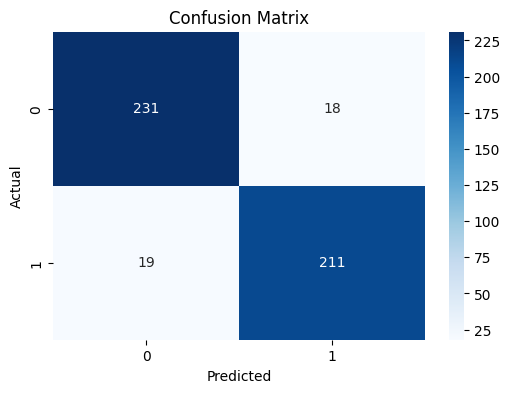


Would you like to predict for a specific student?


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Upload the file first (original code)
from google.colab import files
uploaded = files.upload()

# 2. Load the dataset (original code)
data = pd.read_csv('8. Student Performance Prediction.csv')  # Just the file name

# 3. Create Pass/Fail label based on GPA threshold (original code)
data['Pass'] = data['GPA'].apply(lambda x: 1 if x >= 2.0 else 0)  # 1 = Pass, 0 = Fail

# 4. Select features and target (original code)
features = ['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport']
X = data[features]
y = data['Pass']

# 5. Split into training and testing sets (original code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale the features (original code)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train the Logistic Regression model (original code)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 8. Predict on test set (original code)
y_pred = model.predict(X_test_scaled)

# 9. Evaluate the model (original code)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# 10. Plot the Confusion Matrix (original code)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# NEW FUNCTIONALITY: Optional student prediction
def predict_student():
    print("\nWould you like to predict for a specific student?")
    choice = input("Enter 'y' to predict or any other key to exit: ").lower()

    if choice == 'y':
        print("\nEnter student details:")
        study_time = float(input("StudyTimeWeekly (hours): "))
        absences = int(input("Absences: "))
        tutoring = int(input("Tutoring (1 for Yes, 0 for No): "))
        parental_support = int(input("ParentalSupport (1-10 scale): "))

        # Scale and predict
        student_data = scaler.transform([[study_time, absences, tutoring, parental_support]])
        prediction = model.predict(student_data)[0]
        probability = model.predict_proba(student_data)[0][1]

        print("\nPrediction Result:")
        print(f"Prediction: {'PASS' if prediction == 1 else 'FAIL'}")
        print(f"Confidence: {probability*100:.1f}%")

        # Option to predict another student
        predict_student()

# Start prediction
predict_student()
print("\nProgram completed!")

